# Installation of packages and imports

In [ ]:
!pip install googletrans==3.1.0a0
!pip install haversine
!pip install pyLDAvis              # <- You will need to RESTART the runtime !!!

$\uparrow$ **RECORDA QUE HAS DE REINICIAR EL RUNTIME!!!!**

In [ ]:
# For general purpose
import json
import pickle
import os


# For NLP
import nltk
import gensim
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer, SnowballStemmer

# For LDA visualization
import pyLDAvis.gensim_models
import pyLDAvis

# For Google Translator
from googletrans import Translator


# For f(u,r) 
from scipy.stats import norm
from haversine import haversine


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


# Read restaurant data

In [ ]:
test_f = open("test_reviews.json")
train_f = open("train_reviews.json")
test = json.load(test_f)
train = json.load(train_f)
data = test + train
print(data[0]['reviews_data'][0])

{'user': {'name': 'C. K.', 'link': 'https://www.google.com/maps/contrib/103276150229350690836?hl=en-US&sa=X&ved=2ahUKEwi6jrid-_7zAhX2gGoFHb6TAGEQvvQBegQIARAw', 'thumbnail': 'https://lh3.googleusercontent.com/a-/AOh14Gg9wpEUjooVmGMGkYoMW9N4kHrTxlMPSXOQrDMS=s40-c-c0x00000000-cc-rp-mo-ba5-br100', 'local_guide': True, 'reviews': 274, 'photos': 1238}, 'rating': 4.0, 'date': 'a month ago', 'snippet': 'Overall, not a bad experience. Menu was standard HRC. Chose the nachos and cheesecake. Both were good and filling. Customer Service was awesome. Had a nice meal without any drama.', 'images': ['https://lh5.googleusercontent.com/p/AF1QipOy6FXV_xMmCD7MR2GJuiCN_-OpSD7fRiBpZK02=w100-h100-p-n-k-no', 'https://lh5.googleusercontent.com/p/AF1QipO4c1A7epvhbkcHWo7i1MhAHAFhsXiRDfQWKvkm=w100-h100-p-n-k-no'], 'response': {'date': 'a month ago', 'snippet': 'Hello C.K. Thank you so much for your great score, we really appreciate it.For us, customer satisfaction is our top priority and all the teamwork hard to

In [ ]:
len(data)

300

- Stemming, lemmatizing
- Stopword removing
- Lowercase and remove punctuation

In [ ]:
nltk.download('wordnet')

stemmer = SnowballStemmer("english")

def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
    #return stemmer.stem(WordNetLemmatizer().lemmatize(text))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Example with one review:

In [ ]:
review = data[0]['reviews_data'][0]['snippet']
words = []
for word in review.split(' '):
    words.append(word)
print('Review:')
print(words)
print('After preprocess:')
print(preprocess(review))

Review:
['Overall,', 'not', 'a', 'bad', 'experience.', 'Menu', 'was', 'standard', 'HRC.', 'Chose', 'the', 'nachos', 'and', 'cheesecake.', 'Both', 'were', 'good', 'and', 'filling.', 'Customer', 'Service', 'was', 'awesome.', 'Had', 'a', 'nice', 'meal', 'without', 'any', 'drama.']
After preprocess:
['overall', 'experience', 'menu', 'standard', 'choose', 'nachos', 'cheesecake', 'good', 'fill', 'customer', 'service', 'awesome', 'nice', 'meal', 'drama']


Translate

In [ ]:
translator = Translator()

comments = ""
for restaurant in data:
  for review in restaurant['reviews_data']:
    comments += review['snippet'] + '\n'

tr = translator.translate(comments)

KeyboardInterrupt: ignored

Ho fem per totes les reviews:

In [ ]:
docs = []
for restaurant in data:
  for review in restaurant['reviews_data']:
    docs.append(preprocess(review['snippet']))
len(docs)

#for elem in dictionary:
#  print(dictionary[elem])

42104

LDA

In [ ]:
# Pot tardar uns 3 minuts
dictionary = gensim.corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]
num_topics = 5

lda_model = gensim.models.LdaMulticore(corpus, 
                                   num_topics = num_topics, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.016*"food" + 0.014*"good" + 0.014*"table" + 0.013*"menu" + 0.013*"restaurant" + 0.013*"time" + 0.012*"service" + 0.012*"order" + 0.011*"dish" + 0.009*"go"


Topic: 1 
Words: 0.076*"food" + 0.075*"good" + 0.051*"service" + 0.042*"great" + 0.028*"excellent" + 0.026*"recommend" + 0.023*"price" + 0.023*"place" + 0.020*"quality" + 0.020*"staff"


Topic: 2 
Words: 0.052*"good" + 0.041*"nice" + 0.041*"food" + 0.041*"place" + 0.035*"great" + 0.021*"price" + 0.015*"staff" + 0.015*"tapas" + 0.013*"friendly" + 0.012*"drink"


Topic: 3 
Words: 0.031*"best" + 0.019*"barcelona" + 0.012*"taste" + 0.012*"delicious" + 0.011*"place" + 0.010*"like" + 0.010*"dish" + 0.009*"amaze" + 0.009*"restaurant" + 0.009*"recommend"


Topic: 4 
Words: 0.013*"hotel" + 0.010*"comida" + 0.009*"para" + 0.007*"familia" + 0.006*"pero" + 0.006*"servicio" + 0.006*"buena" + 0.006*"room" + 0.005*"personal" + 0.005*"bien"




In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./test'+str(8))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f) # load the pre-prepared pyLDAvis data from disk

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './hola'+ str(8 ) +'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.118013  0.055331       1        1  24.784940
3     -0.139231  0.193471       2        1  24.764993
1     -0.094479 -0.173674       3        1  24.013142
2     -0.077359 -0.097335       4        1  20.782032
4      0.429082  0.022207       5        1   5.654893, topic_info=           Term          Freq         Total Category  logprob  loglift
7          good  18500.000000  18500.000000  Default  30.0000  30.0000
30         food  18476.000000  18476.000000  Default  29.0000  29.0000
31        great   9603.000000   9603.000000  Default  28.0000  28.0000
13      service  10566.000000  10566.000000  Default  27.0000  27.0000
11         nice   5847.000000   5847.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
552     gracias     78.915702     80.236361   Topic5  -5.9792   2.8561
430    personal    116.007685    242.505107   Topic5  -5.5940   2.1353
1343   japanese    106.530673    482.162663   Topic5  -5.6792   1.3628
119   barcelona     87.872785   4161.178945   Topic5  -5.8717  -0.9850
236       local     79.708097    714.940303   Topic5  -5.9693   0.6788

[368 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
612       1  0.852029   absolutely
612       2  0.122523   absolutely
612       4  0.025350   absolutely
719       1  0.996315  accommodate
658       3  0.012489    accompany
...     ...       ...          ...
813       3  0.996195        worst
235       1  0.430216        worth
235       2  0.209349        worth
235       3  0.188347        worth
235       4  0.172086        worth

[648 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3, 5])

Preview del resultat:

In [ ]:
R = lda_model.get_document_topics(corpus)
weights = []  ## per cada comentari, una distribució de tòpics (ordenat)
for elem in R:
  weights.append(elem)
weights[0]

[(0, 0.31552133),
 (1, 0.36968955),
 (2, 0.012982779),
 (3, 0.2892972),
 (4, 0.01250915)]

In [ ]:
print([w for w in weights])

In [ ]:
sum([val for (num, val) in weights[0]]) ## observem que no suma 1.. Serà problemes de precisió del LDA

1.0000000121071935

Calculem les $r$

In [ ]:
r = []
pos = 0
for restaurant in data:
  avg = np.zeros(num_topics)
  i = 0
  for review in restaurant['reviews_data']: # Iterem cada review
    j = 0
    try:
      for elem in weights[pos+i]:
        avg[elem[0]] += elem[1]
        j += 1
    except:
      print(pos+i)
    i += 1
  if i == 0:
    # If a restaurant has no reviews use uniform distribution
    r.append((np.ones(num_topics)/num_topics).tolist())
  else:
    # Average topic scores
    aux = [elem/i for elem in avg]
    r.append([elem/sum(aux) for elem in aux])
  pos += i

AttributeError: ignored

In [ ]:
import numpy as np

r = []
pos = 0
for restaurant in data:
  avg = np.zeros(num_topics)
  i = 0
  for review in restaurant['reviews_data']: # Iterem cada review
    j = 0
    try:
      for elem in weights[pos+i]:
        avg[elem[0]] += elem[1]
        j += 1
    except:
      print(pos+i)
    i += 1
  aux = [elem/i for elem in avg]
  aux.insert(0, 0)
  r.append(aux)
  pos += i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


Save $r$s for later

In [ ]:
with open("./r", "wb") as fp:
  pickle.dump(r, fp)

In [ ]:
import pickle

rs_file = open("./r", 'rb')
r = pickle.load(rs_file)
print(r[11])

[0, nan, nan, nan, nan, nan]


# Rating Distribution

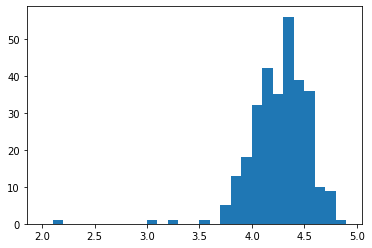

In [ ]:
ratings = []
for restaurant in data:
    ratings.append(restaurant['rating'])

plt.hist(ratings, bins=np.arange(2,5,0.1))
plt.show()

### Loss function

Mean:
4.315
Std:
0.28238567008024096


(array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  1.,  0.,  5., 13., 18., 32., 42., 35., 56., 39., 36.,
        10.,  9.,  1.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
        3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
        4.6, 4.7, 4.8, 4.9]),
 <a list of 29 Patch objects>)

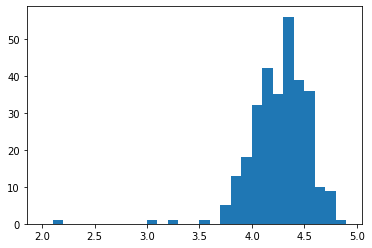

In [ ]:
print("Mean:")
print(np.mean(ratings))
print("Std:")
print(np.std(ratings))
plt.hist(ratings, bins=np.arange(2,5,0.1))

## Scores calculation and update

In [ ]:
print("Mean:")
print(np.mean(ratings))
print("Std:")
print(np.std(ratings))
plt.hist(ratings, bins=np.arange(2,5,0.1))

Mean:


NameError: ignored

We will now define a score function for each restaurant depending on the user and the restaurant. The restaurant will have certain paramethers, one corresponding to the distance and the other ones extracted from the LDA process above. The user will have a paramether related to each one of the paramethers of the restaurant indicating how important is that restaurant paramether to the user.

$f(\alpha, \boldsymbol{u}, \boldsymbol{r}) = F_{\mu, \sigma}(\alpha)\langle \boldsymbol{u}, \boldsymbol{r}\rangle$

Where $\alpha \in [0, 5]$ is the rating of the restaurant (5-star system); $F_{\mu, \sigma}$ is the c.d.f. of a normal distribution with mean $\mu$ and standard deviation $\sigma$; $\mu$ is the mean of the ratings and $\sigma$ its standard deviation (in our dataset, $\mu = 4.315, \sigma=0.2824$)$; \boldsymbol{u} = (u_1, ..., u_n)$ is the vector of parameters of the user and $\boldsymbol{r} = (\frac{1}{1+d(u_{coord}, r_{coord})}, r_2, ..., r_n)$ is the vector of paramethers of the restaurant.

We use the c.d.f. of the normal distribution to linealize the ratings of the restaurants. Then, with the scalar product we can set how much importance the user gives to each paramether of the restaurant. Finally, the first paramether of $\boldsymbol{r}$ corresponds to the inverse of the distance between the user and the restaurant since the closest the user is to the restaurant, the higher the score (we add +1 for domain purposes).


We also define an update function on the user preferences to latter apply reinforcement learning:
$\boldsymbol{u}^{(i+1)} = \frac{\boldsymbol{u}^{(i)}}{\beta} + (2F_{\mu, \sigma}(\alpha) - 1)\boldsymbol{r}$

Here, $\beta$ is a decay parameter on the importance of past preferences of the user, if it is too big past preferences will have no importance, that is why (also by trial and error), we chose $\beta = 1.2$; $\alpha$ is different from the score function, here $\alpha \in [0, 5]$ but corresponds to a 5-star rating system of the recommendation we give; and finally $\boldsymbol{r}$ is the vector of paramethers of the recommended restaurant.


In [ ]:
from scipy.stats import norm
!pip install haversine
from haversine import haversine
import math

In [ ]:
def fun_score(rating, r_pos, u_pos, r, u):
  '''rating belongs to [1, 5], r_pos is a 2-sized tuple, u_pos is a 2-sized tuple, r is the vector of paramethers of the restaurant, u is the vector of paramethers of the user'''

  # The rating (5-star sistem) distribution is normal. We linealize the rating:
  rating_score = norm.cdf(rating, loc=np.mean(ratings), scale=np.std(ratings))

  # We want distance to be inversly proportional to restaurant score
  r[0] = 1/(1+haversine(r_pos, u_pos, unit='km'))
  r = r / np.sqrt(np.sum(r**2))

  return rating_score*(np.dot(u, r))

def update_u(u, beta, recom_rating, r):
  '''u is the vector of paramethers of the user, beta is a real higher than 1, recom_rating belongs to [1, 5], r is the vector of paramethers of the restaurant chosen'''

  # We apply a decay to past preferences and we linealize and normalize into the [-1, 1] interval the recommendation rating
  r = r / np.sqrt(np.sum(r**2))
  u = (1/beta)*np.asanyarray(u) + (2*norm.cdf(recom_rating, loc=np.mean(ratings), scale=np.std(ratings)) - 1)*np.asarray(r)

  return u / np.sqrt(np.sum(u**2))

In [ ]:
def filter(price, mode, type_rest, max_dist, u_pos):
  '''This function filter all the restaurants by the following parameters:
  price is a vector belonging to the powerset of ['$', '$$', '$$$', '$$$$'], 
  mode is a 3-sized tuple of booleans corresponding to if the restaurant has (dine-in, takeout, delivery), 
  type_rest is a vector belonging to the powerset of the vector of diferent types of restaurants, 
  max_dist is the maximum distance the user is willing to move (in km) and 
  u_pos is the location of the user (2-sized tuple containing latitude and longitude)'''
  restaurants = []
  for restaurant in data:
    try:
      dist = haversine((restaurant['gps_coordinates']['latitude'], restaurant['gps_coordinates']['longitude']), u_pos, unit='km')
      if restaurant['price'] in price and restaurant['type'] in type_rest and max_dist > dist and (mode[0]*restaurant['service_options']['dine_in'] or mode[1]*restaurant['service_options']['takeout'] or mode[2]*restaurant['service_options']['delivery']):
        restaurants.append(restaurant)
    except:
      pass
  return restaurants

u_pos = (41.3858942, 2.1707583)
mode = [0, 1, 1]
S = filter(['$', '$$', '$$$'], mode, [restaurant['type'] for restaurant in data], 10, u_pos)

149


The idea will be to apply the score funtion to all the restaurants that passed the filter, choose the top 15% and then choose five of them following a certain distribution of probability. Each restaurant will have a probability of: $\frac{(\hat{f}(\alpha, \boldsymbol{u}, \boldsymbol{r}))^2}{\sum_{\forall \boldsymbol{r} \in \boldsymbol{R}}{(\hat{f}(\alpha, \boldsymbol{u}, \boldsymbol{r}))^2}}$.

Finally, the user will choose a restaurant from these 5 recommendations and give us a review (5-star system) on our recommendation. Based on this review, we will update $\boldsymbol{u}$.

In [ ]:
r[11]

[0.6001186025618187, 0.2, 0.2, 0.2, 0.2, 0.2]

In [ ]:
id_to_r = dict(zip([restaurant['place_id'] for restaurant in S], r))

# We get NaN in the 11th restaurant's paramethers, so we inpute them
r[11][1] = 0.2
r[11][2] = 0.2
r[11][3] = 0.2
r[11][4] = 0.2
r[11][5] = 0.2

# We initialize the user preferences on the restaurant paramethers. At first we consider the distance to the restaurant as the only importat paramether.
u = [1, 0, 0, 0, 0, 0]

def recommendation_step():
  global u
  # We apply the score function to all restaurants
  valued_restaurants_u = [(restaurant['place_id'], fun_score(restaurant['rating'], (restaurant['gps_coordinates']['latitude'], restaurant['gps_coordinates']['longitude']), u_pos, id_to_r[restaurant['place_id']], u)) for restaurant in S]
  # We sort all restaurants by score (descending)
  valued_restaurants_u.sort(key=lambda x: x[1], reverse=True)
  # We take the top 15% of restaurants (or 10 of them if the 15% is less than 10, or all of them if they are less than 10)
  chosen_restaurants = valued_restaurants_u[0:max(int(0.15*len(valued_restaurants_u)), min(10, len(valued_restaurants_u)))]
  # We define our probalibity distribution for the random choice as score^2/sum(scores^2). We use squared to reduce a little bit the randomness
  chosen_restaurants_distribution = []
  sum_p2 = 0
  for restaurant in chosen_restaurants:
    # We map the score from [-1, 1] to [0, 1]
    aux = (restaurant[1] + 1) / 2
    sum_p2 += aux**2
    chosen_restaurants_distribution.append(aux**2)
  for i in range(len(chosen_restaurants_distribution)):
    chosen_restaurants_distribution[i] = chosen_restaurants_distribution[i] * (1 / sum_p2)
  if len(chosen_restaurants) < 5:
    print("No hi ha suficients restaurants a recomanar")
  # We select 5 restaurants from the top restaurants using the probability distribution defined
  suggestion = np.random.choice(len(chosen_restaurants), size=5, replace=False, p=chosen_restaurants_distribution)
  suggestion = [chosen_restaurants[index] for index in suggestion]
  print(suggestion)
  
  restaurant_selected = int(input('Select restaurant from 1 to 5:'))
  recomendation_score = float(input('Please, give us a valuation (1 to 5 stars) on the recomendation:'))
  print(u)
  u = update_u(u, 1.2, recomendation_score, id_to_r[chosen_restaurants[restaurant_selected - 1][0]])
  print(u)

recommendation_step()

NameError: ignored

In [ ]:
recommendation_step()
recommendation_step()
recommendation_step()
recommendation_step()